# [Zarr SODA 3.4.2 ds](https://www2.atmos.umd.edu/~ocean/index_files/soda3.4.2_mn_download_b.htm)

> https://www.soda.umd.edu/
>> https://www2.atmos.umd.edu/~ocean/index_files/soda3_readme.htm

>> https://www2.atmos.umd.edu/~ocean/index_files/soda3.3.1_mn_download.htm

>> https://dsrs.atmos.umd.edu/DATA/soda3.4.2/ORIGINAL/

In [39]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [40]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.7bf17befaf9847d6aaa9417ce9e9b952/status,


In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec
%matplotlib inline
import json

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [3]:
url_ocean = 'gs://pangeo-forge-us-central1/pangeo-forge/soda/soda3.4.2_5dy_ocean_or'
url_transport = 'gs://pangeo-forge-us-central1/pangeo-forge/soda/soda3.4.2_10dy_transport_or'
#url_ice = 'gs://pangeo-forge-us-central1/pangeo-forge/soda/soda3.4.2_5dy_ice_or'

fs = gcsfs.GCSFileSystem(requester_pays=True)
ocean = xr.open_zarr(fs.get_mapper(url_ocean), consolidated=True)
transport = xr.open_zarr(fs.get_mapper(url_transport), consolidated=True)
#ice = xr.open_zarr(fs.get_mapper(url_ice), consolidated=True)

In [4]:
ocean

<xarray.Dataset>
Dimensions:          (time: 1970, yt_ocean: 1070, xt_ocean: 1440, nv: 2,
                      st_ocean: 50, st_edges_ocean: 51, sw_edges_ocean: 51,
                      sw_ocean: 50, yu_ocean: 1070, xu_ocean: 1440)
Coordinates:
  * nv               (nv) float64 1.0 2.0
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * time             (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * xu_ocean         (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yt_ocean         (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.84 89.95
  * yu_ocean         (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.89 90.0
Data variables: (12/32)
    anompb           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    average_DT       (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    evap_heat        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    hflux_cpl        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    ...               ...
    tauy             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    time_bounds      (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    u                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    v                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    wt               (time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
Attributes:
    filename:   soda3.4.2_5dy_ocean_or_1993_01_04.nc
    grid_tile:  1
    grid_type:  mosaic
    title:      MOM5_SODA_3.4.2

In [7]:
ocean.time.dt.season

<xarray.DataArray 'season' (time: 1970)>
array(['DJF', 'DJF', 'DJF', ..., 'DJF', 'DJF', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00

In [4]:
transport

<xarray.Dataset>
Dimensions:         (time: 985, nv: 2, st_edges_ocean: 51, st_ocean: 50, yt_ocean: 1070, xu_ocean: 1440, yu_ocean: 1070, xt_ocean: 1440)
Coordinates:
  * nv              (nv) float64 1.0 2.0
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time            (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
  * xt_ocean        (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * xu_ocean        (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yt_ocean        (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.84 89.95
  * yu_ocean        (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
Data variables:
    average_DT      (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1      (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2      (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    tx_int          (time, yt_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    tx_trans        (time, st_ocean, yt_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
    ty_int          (time, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1070, 1440), meta=np.ndarray>
    ty_trans        (time, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1070, 1440), meta=np.ndarray>
Attributes:
    filename:   soda3.4.2_10dy_transport_or_1993_01_07.nc
    grid_tile:  1
    grid_type:  mosaic
    title:      MOM5_SODA_3.4.2

In [5]:
ice = xr.open_dataset('soda3.4.2_5dy_ice_or_1992_01_10.nc')

In [6]:
ice

<xarray.Dataset>
Dimensions:      (xt: 1440, xb: 1441, yt: 1070, yb: 1071, ct: 5, time: 1, nv: 2, xv: 1440, yv: 1070)
Coordinates:
  * xt           (xt) float64 -279.9 -279.7 -279.4 -279.2 ... 79.42 79.65 79.88
  * xb           (xb) float64 -280.0 -279.8 -279.5 -279.3 ... 79.53 79.77 80.0
  * yt           (yt) float64 -80.02 -79.92 -79.81 -79.7 ... 78.84 78.84 78.85
  * yb           (yb) float64 -80.07 -79.97 -79.86 -79.76 ... 78.84 78.85 78.85
  * ct           (ct) float64 0.0 0.1 0.3 0.7 1.1
  * time         (time) object 1992-01-10 13:00:00
  * nv           (nv) float64 1.0 2.0
  * xv           (xv) float64 -279.8 -279.5 -279.3 -279.1 ... 79.53 79.77 80.0
  * yv           (yv) float64 -79.97 -79.86 -79.76 -79.65 ... 78.84 78.85 78.85
Data variables:
    cn           (time, ct, yt, xt) float32 ...
    hi           (time, yt, xt) float32 ...
    hs           (time, yt, xt) float32 ...
    mi           (time, yt, xt) float32 ...
    ui           (time, yv, xv) float32 ...
    vi           (time, yv, xv) float32 ...
    ix_trans     (time, yt, xv) float32 ...
    iy_trans     (time, yv, xt) float32 ...
    average_T1   (time) datetime64[ns] ...
    average_T2   (time) datetime64[ns] ...
    average_DT   (time) timedelta64[ns] ...
    time_bounds  (time, nv) timedelta64[ns] ...
Attributes:
    filename:   soda3.4.2_5dy_ice_or_1992_01_10.nc
    title:      MOM5_SODA_3.4.2
    grid_type:  mosaic
    grid_tile:  1

In [7]:
ice.mi

<xarray.DataArray 'mi' (time: 1, yt: 1070, xt: 1440)>
[1540800 values with dtype=float32]
Coordinates:
  * xt       (xt) float64 -279.9 -279.7 -279.4 -279.2 ... 79.42 79.65 79.88
  * yt       (yt) float64 -80.02 -79.92 -79.81 -79.7 ... 78.83 78.84 78.84 78.85
  * time     (time) object 1992-01-10 13:00:00
Attributes:
    long_name:      ice mass
    units:          kg/m^2
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [10]:
ocean.time

<xarray.DataArray 'time' (time: 1970)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

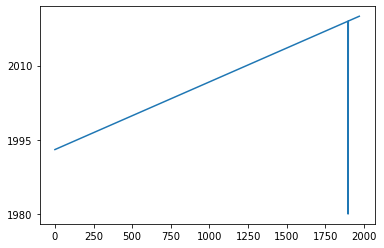

In [11]:
plt.plot(ocean.time.values)

In [17]:
ocean.time.isel(time=slice(1895, 1899)).values

array([cftime.DatetimeJulian(2018, 12, 14, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1980, 1, 1, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1980, 1, 1, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2018, 12, 29, 13, 0, 0, 0, has_year_zero=False)],
      dtype=object)

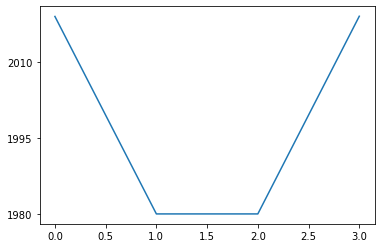

In [13]:
plt.plot(ocean.time.isel(time=slice(1895, 1899)).values)

In [5]:
#fix time dim (1896/1897 indices are 1980-01-01)
test_time = xr.cftime_range('1993-01-04 13:00:00', freq='5D', periods=1970, calendar='julian')
ocean_test = ocean.copy()
ocean_test = ocean.assign_coords(coords={'time': test_time})
#ocean_test = ocean.assign_attrs(ocean.time.attrs)
ocean['time'] = ocean_test.time

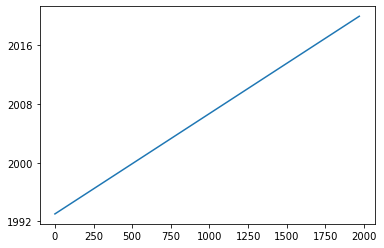

In [19]:
plt.plot(ocean.time.values)

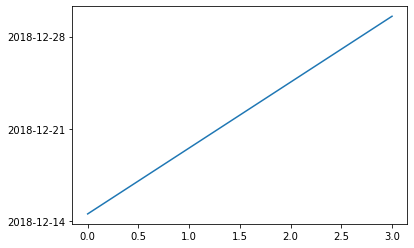

In [20]:
plt.plot(ocean.time.isel(time=slice(1895, 1899)).values)

In [21]:
ocean.time.isel(time=slice(1895, 1899)).values

array([cftime.DatetimeJulian(2018, 12, 14, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2018, 12, 19, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2018, 12, 24, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2018, 12, 29, 13, 0, 0, 0, has_year_zero=False)],
      dtype=object)

In [27]:
ocean.time.isel(time=slice(290, 330)).values

array([cftime.DatetimeJulian(1996, 12, 24, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1996, 12, 29, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 1, 3, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 1, 8, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 1, 13, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 1, 18, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 1, 23, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 1, 28, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 2, 2, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 2, 7, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 2, 12, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 2, 17, 13, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1997, 2, 22, 13, 0, 0, 0, has_year_zero=False),
 

In [42]:
ocean.salt

,Array,Chunk
Bytes,565.38 GiB,293.88 MiB
Shape,"(1970, 50, 1070, 1440)","(1, 50, 1070, 1440)"
Count,1971 Tasks,1970 Chunks
Type,float32,numpy.ndarray


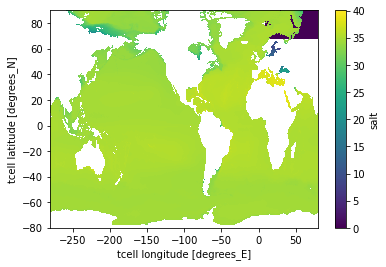

In [41]:
ocean.salt.mean('st_ocean').mean('time').plot()

In [44]:
ocean.temp

,Array,Chunk
Bytes,565.38 GiB,293.88 MiB
Shape,"(1970, 50, 1070, 1440)","(1, 50, 1070, 1440)"
Count,1971 Tasks,1970 Chunks
Type,float32,numpy.ndarray


distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


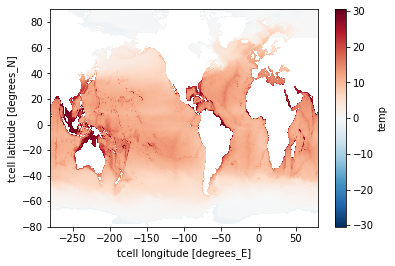

In [43]:
ocean.temp.mean('st_ocean').mean('time').plot()

In [37]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
lower_lat = 0 #-80.02101494
upper_lat_old = 169 #-62.01972704
upper_lat = 225 #-54.70774816
left_lon =  859 #-65.12
right_lon_old = 1240 #30.12
right_lon = 1200 #20.125

lower_lat_u = 0 #-79.96821565
upper_lat_u = 169 #-61.96096874 python is right exclusive so will have -62.0 in array
left_lon_u = 859 #-65.0
right_lon_u = 1240 #30.25 python is right exclusive so will have 30.0˚E

In [38]:
#set the boundaries
lat_range = dict(yt_ocean=slice(lower_lat, upper_lat), yu_ocean=slice(lower_lat_u, upper_lat_u))
lon_range = dict(xt_ocean=slice(left_lon, right_lon), xu_ocean=slice(left_lon_u, right_lon_u))

lat_range_no_u = dict(yt_ocean=slice(lower_lat, upper_lat))
lon_range_no_u = dict(xt_ocean=slice(left_lon, right_lon))

lat_range_no_u_old = dict(yt_ocean=slice(lower_lat, upper_lat_old))
lon_range_no_u_old = dict(xt_ocean=slice(left_lon, right_lon_old))

lat_range_u = dict(yu_ocean=slice(lower_lat_u, upper_lat_u))
lon_range_u = dict(xu_ocean=slice(left_lon_u, right_lon_u))

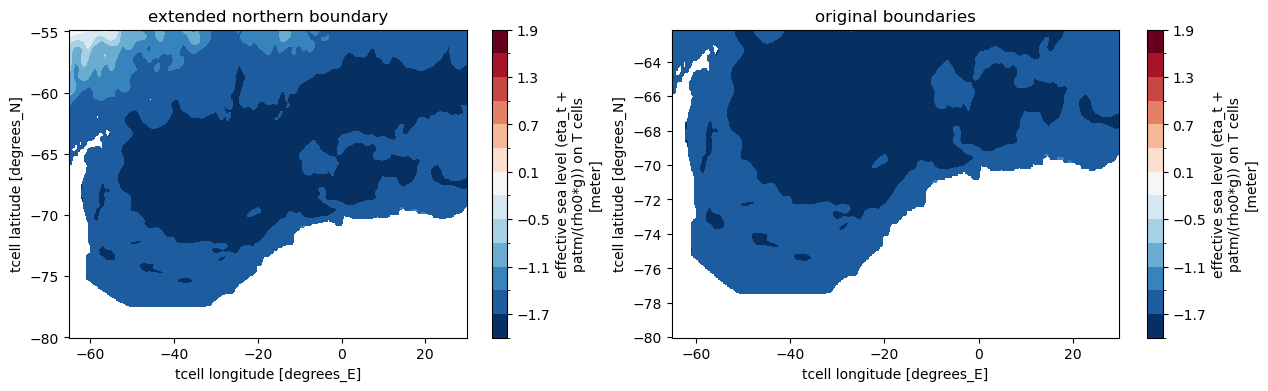

In [31]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4), gridspec_kw={'width_ratios': [2.4,2.7]})
ocean.ssh.isel(**lat_range_no_u, **lon_range_no_u)[0].plot.contourf(levels=np.arange(-2,2,0.3), ax=ax0)
ocean.ssh.isel(**lat_range_no_u_old, **lon_range_no_u)[0].plot.contourf(levels=np.arange(-2,2,0.3), ax=ax1)

ax0.set_title('extended northern boundary')
ax1.set_title('original boundaries');

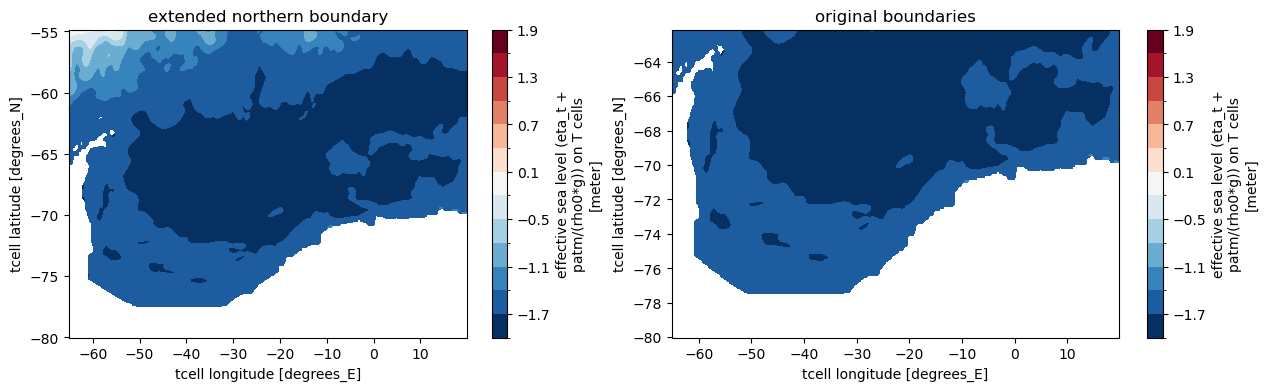

In [39]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4), gridspec_kw={'width_ratios': [2.4,2.7]})
ocean.ssh.isel(**lat_range_no_u, **lon_range_no_u)[0].plot.contourf(levels=np.arange(-2,2,0.3), ax=ax0)
ocean.ssh.isel(**lat_range_no_u_old, **lon_range_no_u)[0].plot.contourf(levels=np.arange(-2,2,0.3), ax=ax1)

ax0.set_title('extended northern boundary')
ax1.set_title('original boundaries');

In [4]:
import xgcm

grid_ocean = xgcm.Grid(ocean, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'}, 
                                      'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                                      'T': {'center': 'time'},
                                      'Z': {'center': 'st_edges_ocean', 'right': 'st_ocean'},
                                      'Zu': {'center': 'sw_edges_ocean', 'right': 'sw_ocean'}},
                     periodic=['X'])
grid_ocean

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary=None):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   st_edges_ocean --> right
  * right    st_ocean --> center
Zu Axis (not periodic, boundary=None):
  * center   sw_edges_ocean --> right
  * right    sw_ocean --> center

In [5]:
grid_transport = xgcm.Grid(transport, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'}, 
                                              'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                                              'T': {'center': 'time'},
                                              'Z': {'center': 'st_edges_ocean', 'right': 'st_ocean'},
                                              'Zu': {'center': 'sw_edges_ocean', 'right': 'sw_ocean'}},
                     periodic=['X'])
grid_transport

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary=None):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   st_edges_ocean --> right
  * right    st_ocean --> center
Zu Axis (not periodic, boundary=None):
  * center   sw_edges_ocean --> right
  * right    sw_ocean --> center

## Variables to create:

- [ ] Vel terms for psi
- [ ] Surf flux term (incl. sw penetration)
- [ ] Total tendency term

## <font color='Green'>Get cell area and volume in meters</font>

In [6]:
#calculating meters per latitudinal & longitudinal degree
earth_radius = 6.371e6
earth_circumference = 2*np.pi*earth_radius
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [7]:
#converting lat from degrees to meters
delta_lat = grid_ocean.diff(ocean.yt_ocean, 'Y', boundary='fill', fill_value=np.nan)
dy = delta_lat * meters_per_degree
delta_lat_u = grid_ocean.diff(ocean.yu_ocean, 'Y', boundary='fill', fill_value=np.nan)
dy_u = delta_lat_u * meters_per_degree

#converting degrees lon to lon [meters] (pinching at the poles)
delta_lon = grid_ocean.diff(ocean.xt_ocean, 'X', boundary_discontinuity=360)
dx = delta_lon * meters_per_degree * np.cos(np.deg2rad(ocean.yt_ocean))
delta_lon_u = grid_ocean.diff(ocean.xu_ocean, 'X', boundary_discontinuity=360)
dx_u = delta_lon_u * meters_per_degree * np.cos(np.deg2rad(ocean.yu_ocean))

In [8]:
dx

<xarray.DataArray (xu_ocean: 1440, yt_ocean: 1070)>
array([[4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       ...,
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508],
       [4817.15765359, 4867.60859943, 4918.04301095, ...,  128.04559522,
          76.81169061,   25.57752508]])
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95

In [29]:
dx_u

<xarray.DataArray (xt_ocean: 1440, yu_ocean: 1070)>
array([[4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       ...,
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12],
       [4.84238518e+03, 4.89282788e+03, 4.94325396e+03, ...,
        1.02428686e+02, 5.11946296e+01, 1.70218139e-12]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0

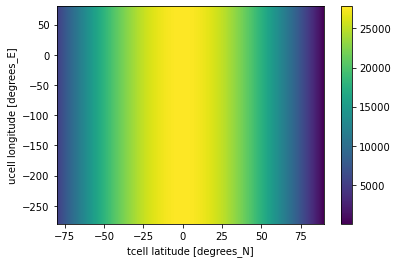

In [30]:
dx.plot()

In [9]:
dz = grid_ocean.diff(ocean.st_edges_ocean[1:], 'Z', boundary='fill', fill_value=0.)
dz_u = grid_ocean.diff(ocean.sw_edges_ocean[1:], 'Zu', boundary='fill', fill_value=0.)

In [10]:
cell_elements = xr.merge([dx.rename('dx'), dx_u.rename('dx_u'), 
                          dy.rename('dy'), dy_u.rename('dy_u'), 
                          dz.rename('dz'), dz_u.rename('dz_u')])

In [33]:
cell_elements

<xarray.Dataset>
Dimensions:   (st_ocean: 50, sw_ocean: 50, xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1070, yu_ocean: 1070)
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_ocean  (sw_ocean) float64 10.07 20.16 30.29 ... 5.08e+03 5.29e+03 5.5e+03
Data variables:
    dx        (xu_ocean, yt_ocean) float64 4.817e+03 4.868e+03 ... 76.81 25.58
    dx_u      (xt_ocean, yu_ocean) float64 4.842e+03 4.893e+03 ... 1.702e-12
    dy        (yu_ocean) float64 1.174e+04 1.174e+04 1.174e+04 ... 1.174e+04 nan
    dy_u      (yt_ocean) float64 nan 1.174e+04 1.174e+04 ... 1.174e+04 1.173e+04
    dz        (st_ocean) float64 10.09 10.13 10.18 ... 209.9 209.9 -5.5e+03
    dz_u      (sw_ocean) float64 10.12 10.14 10.22 ... 209.9 105.0 -5.5e+03

## <font color='Green'>Slice to WG region</font>

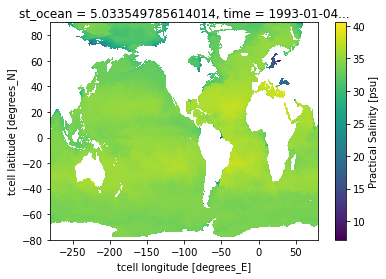

In [8]:
ocean.salt[0,0].plot()

In [9]:
ocean.salt[0,0]

<xarray.DataArray 'salt' (yt_ocean: 1070, xt_ocean: 1440)>
dask.array<getitem, shape=(1070, 1440), dtype=float32, chunksize=(1070, 1440), chunktype=numpy.ndarray>
Coordinates:
    st_ocean  float64 5.034
    time      object 1993-01-04 13:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      Practical Salinity
    standard_name:  sea_water_salinity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          psu
    valid_range:    [-10.0, 100.0]

In [11]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
lower_lat = 0 #-80.02101494
upper_lat = 169 #-62.01972704
left_lon =  859 #-65.12
right_lon = 1240 #30.12

lower_lat_u = 0 #-79.96821565
upper_lat_u = 169 #-61.96096874 python is right exclusive so will have -62.0 in array
left_lon_u = 859 #-65.0
right_lon_u = 1240 #30.25 python is right exclusive so will have 30.0˚E

In [12]:
#set the boundaries
lat_range = dict(yt_ocean=slice(lower_lat, upper_lat), yu_ocean=slice(lower_lat_u, upper_lat_u))
lon_range = dict(xt_ocean=slice(left_lon, right_lon), xu_ocean=slice(left_lon_u, right_lon_u))

lat_range_no_u = dict(yt_ocean=slice(lower_lat, upper_lat))
lon_range_no_u = dict(xt_ocean=slice(left_lon, right_lon))

lat_range_u = dict(yu_ocean=slice(lower_lat_u, upper_lat_u))
lon_range_u = dict(xu_ocean=slice(left_lon_u, right_lon_u))

In [13]:
ocean_wg = ocean.isel(**lat_range, **lon_range)
transport_wg = transport.isel(**lat_range, **lon_range)
cells_wg = cell_elements.isel(**lat_range, **lon_range)

In [14]:
import xgcm

grid_ocean_wg = xgcm.Grid(ocean_wg, coords={'X': {'center': 'xt_ocean', 'right': 'xu_ocean'}, 
                                      'Y': {'center': 'yt_ocean', 'right': 'yu_ocean'},
                                      'T': {'center': 'time'},
                                      'Z': {'center': 'st_edges_ocean', 'right': 'st_ocean'},
                                      'Zu': {'center': 'sw_edges_ocean', 'right': 'sw_ocean'}},
                     periodic=['X'])
grid_ocean_wg

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary=None):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   st_edges_ocean --> right
  * right    st_ocean --> center
Zu Axis (not periodic, boundary=None):
  * center   sw_edges_ocean --> right
  * right    sw_ocean --> center

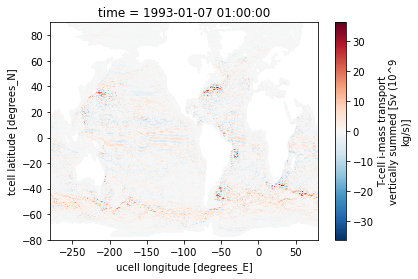

In [38]:
transport.tx_int[0].plot()

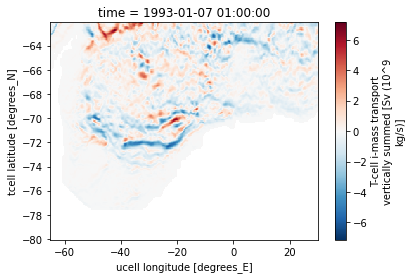

In [39]:
transport_wg.tx_int[0].plot()

## <font color='Green'>\begin{equation*} Transport/Vel\ terms \end{equation*}</font>

In [41]:
transport_wg.tx_trans.isel(xu_ocean=-1)

<xarray.DataArray 'tx_trans' (time: 985, st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(985, 50, 169), dtype=float32, chunksize=(1, 50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    xu_ocean  float64 30.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_c geolat_t
    long_name:      T-cell i-mass transport
    standard_name:  ocean_x_mass_transport
    time_avg_info:  average_T1,average_T2,average_DT
    units:          Sv (10^9 kg/s)
    valid_range:    [-1.0000000200408773e+20, 1.0000000200408773e+20]

In [42]:
cells_wg.dz.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [43]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [44]:
transport_wg.ty_trans.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... -62.31 -62.2 -62.08

In [45]:
cells_wg.dx_u.coords

Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... -62.31 -62.2 -62.08

In [46]:
u_transport_right = (transport_wg.tx_trans * cells_wg.dz * cells_wg.dy_u).isel(xu_ocean=-1)
u_transport_left = (transport_wg.tx_trans * cells_wg.dz * cells_wg.dy_u).isel(xu_ocean=0)

v_transport = (transport_wg.ty_trans * cells_wg.dz * cells_wg.dx_u).isel(yu_ocean=-1)

In [47]:
ocean_wg.wt[0].coords

Coordinates:
  * sw_ocean  (sw_ocean) float64 10.07 20.16 30.29 ... 5.08e+03 5.29e+03 5.5e+03
    time      object 1993-01-04 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [48]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [15]:
dx_interp = grid_ocean_wg.interp(cells_wg.dx_u, 'Y', boundary='fill')

In [50]:
dx_interp.coords

Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [51]:
w_transport = (ocean_wg.wt * dx_interp * cells_wg.dy_u).isel(sw_ocean=0)

In [52]:
# constants
heat_capacity_cp = 3.994e3
runit2mass = 1.035e3 #rho

#surf_transport = (ocean_wg.net_heating * dx_interp * cells_wg.dy_u) / (heat_capacity_cp * runit2mass)
surf_transport = ocean_wg.net_heating  / (heat_capacity_cp * runit2mass)

In [53]:
u_transport_left[0]

<xarray.DataArray (st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(50, 169), dtype=float64, chunksize=(50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
    time      object 1993-01-07 01:00:00
    xu_ocean  float64 -65.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

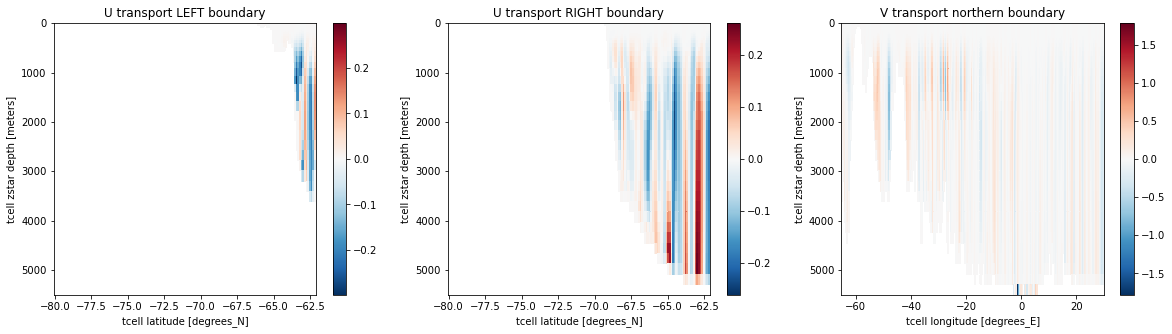

In [54]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(20,5))

(u_transport_left[0]/1e6).plot(yincrease=False, ax=ax0)
ax0.set_title('U transport LEFT boundary')
(u_transport_right[0]/1e6).plot(yincrease=False, ax=ax1) 
ax1.set_title('U transport RIGHT boundary')
(v_transport[0]/1e6).plot(yincrease=False, ax=ax2)
ax2.set_title('V transport northern boundary');

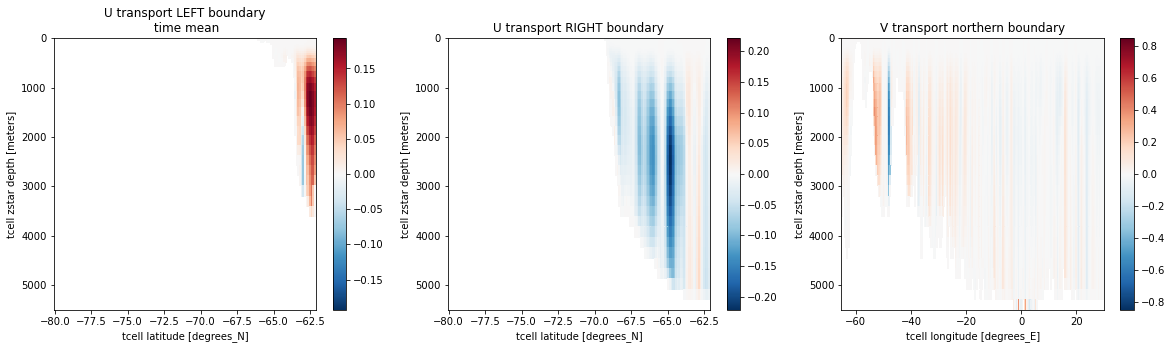

In [55]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(20,5))

(u_transport_left.mean(dim='time')/1e6).plot(yincrease=False, ax=ax0)
ax0.set_title('U transport LEFT boundary\n time mean')
(u_transport_right.mean(dim='time')/1e6).plot(yincrease=False, ax=ax1) 
ax1.set_title('U transport RIGHT boundary')
(v_transport.mean(dim='time')/1e6).plot(yincrease=False, ax=ax2)
ax2.set_title('V transport northern boundary');

In [56]:
client.restart()

Client Scheduler: gateway://traefik-gcp-uscentral1b-staging-dask-gateway.staging:80/staging.75d52fce42964199be01e134b6458ec4 Dashboard: /services/dask-gateway/clusters/staging.75d52fce42964199be01e134b6458ec4/status,Cluster Workers: 25 Cores: 50 Memory: 214.75 GB


In [71]:
u_transport_right

<xarray.DataArray (time: 985, st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(985, 50, 169), dtype=float64, chunksize=(1, 50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    xu_ocean  float64 30.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [72]:
u_transport_left

<xarray.DataArray (time: 985, st_ocean: 50, yt_ocean: 169)>
dask.array<getitem, shape=(985, 50, 169), dtype=float64, chunksize=(1, 50, 169), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    xu_ocean  float64 -65.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [73]:
v_transport

<xarray.DataArray (time: 985, st_ocean: 50, xt_ocean: 381)>
dask.array<getitem, shape=(985, 50, 381), dtype=float64, chunksize=(1, 50, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
    yu_ocean  float64 -62.08

In [74]:
w_transport

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
    sw_ocean  float64 10.07
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00

In [75]:
surf_transport

<xarray.DataArray 'net_heating' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00

In [57]:
# BEST WAY TO DO IT
u_transport_mean_value = (u_transport_right.fillna(0.).sum(dim=['yt_ocean', 'st_ocean']) -
                          u_transport_left.fillna(0.).sum(dim=['yt_ocean', 'st_ocean'])).mean(dim='time')/1e6
u_transport_mean_value.load()

<xarray.DataArray ()>
array(-69.76946809)

In [58]:
v_transport_mean_value = (v_transport).fillna(0.).sum(dim=['xt_ocean', 'st_ocean']).mean(dim='time')/1e6
v_transport_mean_value.load()

<xarray.DataArray ()>
array(71.82896706)
Coordinates:
    yu_ocean  float64 -62.08

In [78]:
w_transport_mean_value = (w_transport).fillna(0.).sum(dim=['xt_ocean', 'yt_ocean']).mean(dim='time')/1e6
w_transport_mean_value.load()

<xarray.DataArray ()>
array(0.85836276)
Coordinates:
    sw_ocean  float64 10.07

In [79]:
surf_transport_mean_value = surf_transport.fillna(0.).sum(dim=['xt_ocean', 'yt_ocean']).mean(dim='time')
surf_transport_mean_value.load()

<xarray.DataArray 'net_heating' ()>
array(-0.18487322, dtype=float32)

In [59]:
residual = u_transport_mean_value + v_transport_mean_value #+ surf_transport_mean_value
residual

<xarray.DataArray ()>
array(2.05949897)
Coordinates:
    yu_ocean  float64 -62.08

## <font color='Green'>\begin{equation*} Surface\ Fluxes \end{equation*}</font>

In [81]:
ocean_wg.salt_flux_total

<xarray.DataArray 'salt_flux_total' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      sfc_salt_flux_total
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/(m^2*sec)
    valid_range:    [-10000.0, 10000.0]

In [82]:
ocean_wg.hflux_total

<xarray.DataArray 'hflux_total' (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 169, 381), dtype=float32, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      surface heat flux from coupler plus restore (omits mass t...
    time_avg_info:  average_T1,average_T2,average_DT
    units:          Watts/m^2
    valid_range:    [-10000.0, 10000.0]

In [152]:
dx_interp

<xarray.DataArray (xt_ocean: 381, yt_ocean: 169)>
array([[ 2421.1925913 ,  4867.60653264,  4918.04092274, ...,
        12892.16388804, 12942.07100796, 12992.11771078],
       [ 2421.1925913 ,  4867.60653264,  4918.04092274, ...,
        12892.16388804, 12942.07100796, 12992.11771078],
       [ 2421.1925913 ,  4867.60653264,  4918.04092274, ...,
        12892.16388804, 12942.07100796, 12992.11771078],
       ...,
       [ 2421.1925913 ,  4867.60653264,  4918.04092274, ...,
        12892.16388804, 12942.07100796, 12992.11771078],
       [ 2421.1925913 ,  4867.60653264,  4918.04092274, ...,
        12892.16388804, 12942.07100796, 12992.11771078],
       [ 2421.1925913 ,  4867.60653264,  4918.04092274, ...,
        12892.16388804, 12942.07100796, 12992.11771078]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [150]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [22]:
heat_capacity_cp = 3.994e3 #J/kg/˚C
runit2mass = 1.035e3 #rho

surf_flux_th = (ocean_wg.hflux_total * dx_interp * cells_wg.dy_u) / (heat_capacity_cp * runit2mass) #˚C*m^3/s
surf_flux_slt = (ocean_wg.salt_flux_total * 1000 * dx_interp * cells_wg.dy_u) / runit2mass # psu*m^3/s

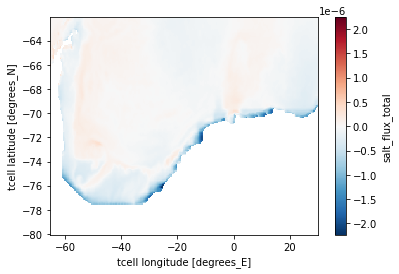

In [43]:
ocean_wg.salt_flux_total.mean(dim='time').plot()

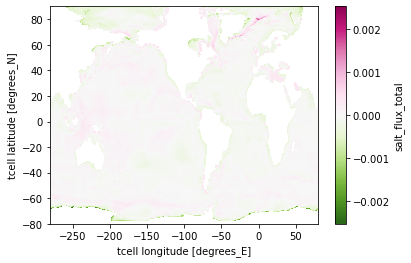

In [54]:
(ocean.salt_flux_total*1000).mean(dim='time').plot(cmap='PiYG_r')

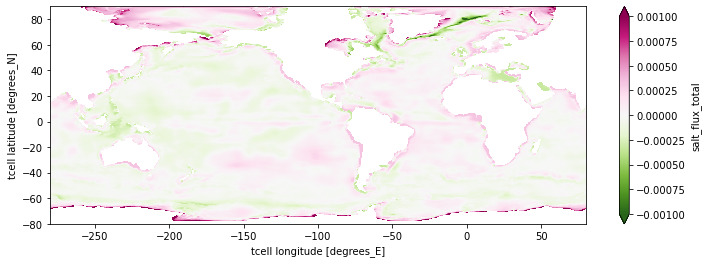

In [57]:
plt.figure(figsize=(12,4))
(-ocean.salt_flux_total*1000).mean(dim='time').plot(cmap='PiYG_r', vmax=.001)

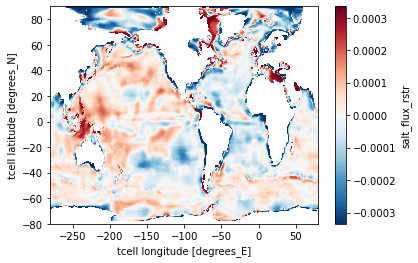

In [48]:
(ocean.salt_flux_rstr*1000).mean(dim='time').plot()

In [58]:
ocean.salt_flux_total.attrs

{'cell_methods': 'time: mean',
 'coordinates': 'geolon_t geolat_t',
 'long_name': 'sfc_salt_flux_total',
 'time_avg_info': 'average_T1,average_T2,average_DT',
 'units': 'kg/(m^2*sec)',
 'valid_range': [-10000.0, 10000.0]}

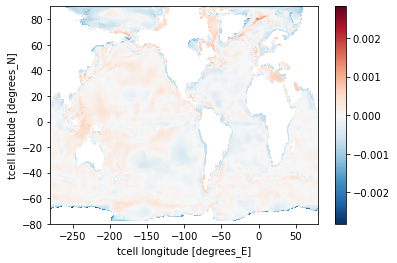

In [51]:
((ocean.salt_flux_total+ocean.salt_flux_rstr)*1000).mean(dim='time').plot()

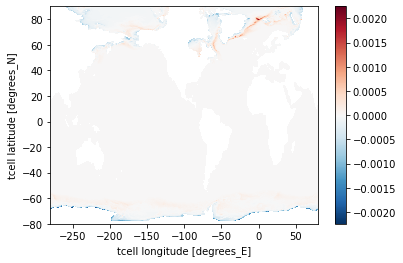

In [52]:
((ocean.salt_flux_total-ocean.salt_flux_rstr)*1000).mean(dim='time').plot()

In [60]:
ocean.evap_heat

<xarray.DataArray 'evap_heat' (time: 1970, yt_ocean: 1070, xt_ocean: 1440)>
dask.array<xarray-evap_heat, shape=(1970, 1070, 1440), dtype=float32, chunksize=(1, 1070, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      latent heat flux into ocean (<0 cools ocean)
    standard_name:  surface_downward_latent_heat_flux
    time_avg_info:  average_T1,average_T2,average_DT
    units:          W/m^2
    valid_range:    [-10000000000.0, 10000000000.0]

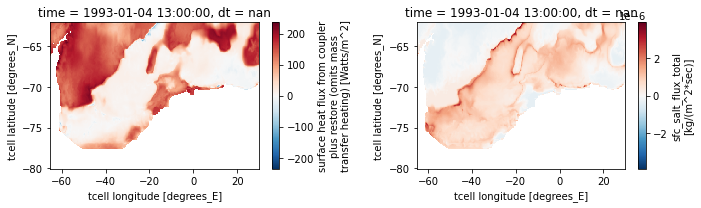

In [159]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
ocean_wg.hflux_total[0].plot(ax=ax0)
ocean_wg.salt_flux_total[0].plot(ax=ax1)
plt.tight_layout();

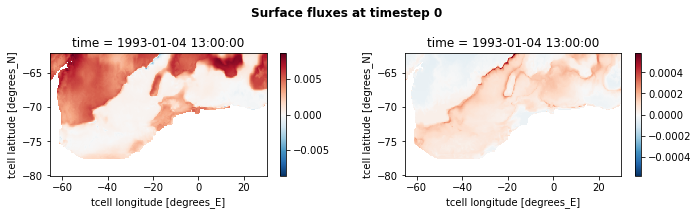

In [25]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(surf_flux_th[0]/1e6).plot(cmap='RdBu_r', ax=ax0)
(surf_flux_slt[0]/1e6).plot(cmap='RdBu_r', ax=ax1)
plt.suptitle('Surface fluxes at timestep 0', fontweight='bold')
plt.tight_layout();

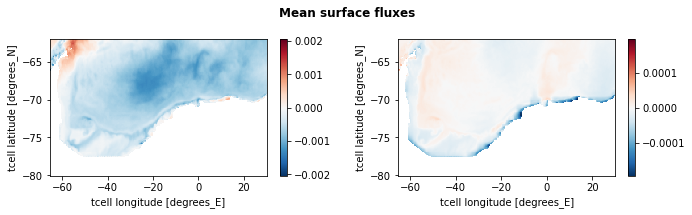

In [26]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(surf_flux_th/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax0)
(surf_flux_slt/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax1)
plt.suptitle('Mean surface fluxes', fontweight='bold')
plt.tight_layout();

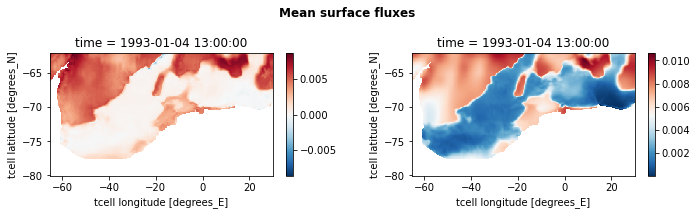

In [20]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(surf_flux_th/1e6)[0].plot(cmap='RdBu_r', ax=ax0)
(sw_flux/1e6)[0].plot(cmap='RdBu_r', ax=ax1)
plt.suptitle('Mean surface fluxes', fontweight='bold')
plt.tight_layout();

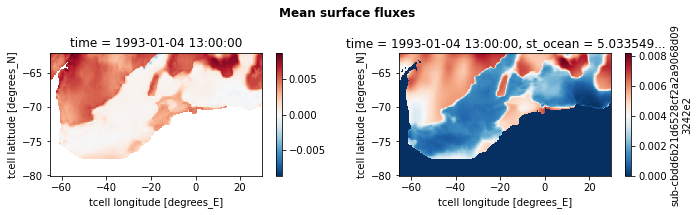

In [31]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(surf_flux_th/1e6)[0].plot(cmap='RdBu_r', ax=ax0)
(sw_flux_conv_TH/1e6)[0, :, :, 0].plot(cmap='RdBu_r', ax=ax1)
plt.suptitle('Mean surface fluxes', fontweight='bold')
plt.tight_layout();

In [26]:
(sw_flux_conv_TH/1e6)[0, :, :, 0]

<xarray.DataArray 'sub-e9f6c20504f49dda02d3f050cf63d0d5' (yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(169, 381), dtype=float64, chunksize=(169, 381), chunktype=numpy.ndarray>
Coordinates:
    time      object 1993-01-04 13:00:00
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
    st_ocean  float64 5.034

In [19]:
(surf_flux_th/1e6)[0]

<xarray.DataArray (yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(169, 381), dtype=float64, chunksize=(169, 381), chunktype=numpy.ndarray>
Coordinates:
    time      object 1993-01-04 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [18]:
(sw_flux/1e6)[0]

<xarray.DataArray (yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(169, 381), dtype=float64, chunksize=(169, 381), chunktype=numpy.ndarray>
Coordinates:
    time      object 1993-01-04 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [162]:
ocean_wg.temp

<xarray.DataArray 'temp' (time: 1970, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
    dt        (time) float32 nan 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      Potential temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-10.0, 500.0]

In [27]:
def surface_to_3d(da):
    da = da.copy()
    da.coords['st_ocean'] = ocean_wg.st_ocean[0]
    da = da.expand_dims(dim='st_ocean', axis=1)
    da, _ = xr.align(da, ocean_wg.st_ocean, join='right')
    return da.fillna(0.)

In [28]:
surf_flux_th

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [29]:
surf_flux_conv_TH = surface_to_3d(surf_flux_th)
surf_flux_conv_SLT = surface_to_3d(surf_flux_slt)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


## SW flux penetration

In [93]:
ocean.swflx.attrs

{'cell_methods': 'time: mean',
 'coordinates': 'geolon_t geolat_t',
 'long_name': 'shortwave flux into ocean (>0 heats ocean)',
 'standard_name': 'surface_net_downward_shortwave_flux',
 'time_avg_info': 'average_T1,average_T2,average_DT',
 'units': 'W/m^2',
 'valid_range': [-10000000000.0, 10000000000.0]}

In [94]:
ocean.swflx

<xarray.DataArray 'swflx' (time: 1970, yt_ocean: 1070, xt_ocean: 1440)>
dask.array<xarray-swflx, shape=(1970, 1070, 1440), dtype=float32, chunksize=(1, 1070, 1440), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      shortwave flux into ocean (>0 heats ocean)
    standard_name:  surface_net_downward_shortwave_flux
    time_avg_info:  average_T1,average_T2,average_DT
    units:          W/m^2
    valid_range:    [-10000000000.0, 10000000000.0]

In [30]:
#sw flux
sw_flux = (ocean_wg.swflx * dx_interp * cells_wg.dy_u) / (heat_capacity_cp * runit2mass) #˚C*m^3/s

In [167]:
sw_flux

<xarray.DataArray (time: 1970, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1970, 169, 381), dtype=float64, chunksize=(1, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
    dt        (time) float32 nan 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [31]:
coords = ocean_wg.coords.to_dataset().reset_coords()

In [32]:
coords

<xarray.Dataset>
Dimensions:         (nv: 2, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, time: 1970, xt_ocean: 381, xu_ocean: 381, yt_ocean: 169, yu_ocean: 169)
Coordinates:
  * nv              (nv) float64 1.0 2.0
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * time            (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean        (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.62 29.88
  * xu_ocean        (xu_ocean) float64 -65.0 -64.75 -64.5 ... 29.5 29.75 30.0
  * yt_ocean        (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.25 -62.14
  * yu_ocean        (yu_ocean) float64 -79.97 -79.86 -79.76 ... -62.2 -62.08
Data variables:
    *empty*
Attributes:
    filename:   soda3.4.2_5dy_ocean_or_1993_01_04.nc
    grid_tile:  1
    grid_type:  mosaic
    title:      MOM5_SODA_3.4.2

In [33]:
def swfrac(coords, fact=1., jwtype=2):
    """Clone of MITgcm routine for computing sw flux penetration.
    z: depth of output levels"""
    
    rfac = [0.58 , 0.62, 0.67, 0.77, 0.78]
    a1 = [0.35 , 0.6  , 1.0  , 1.5  , 1.4]
    a2 = [23.0 , 20.0 , 17.0 , 14.0 , 7.9 ]
    
    facz = - fact * coords.st_edges_ocean.sel(st_edges_ocean=slice(0, 215))
    j = jwtype-1
    swdk = (rfac[j] * np.exp(facz / a1[j]) +
            (1-rfac[j]) * np.exp(facz / a2[j]))
            
    return swdk.rename('swdk')

_, swdown = xr.align(ocean_wg.st_edges_ocean, sw_flux * swfrac(coords), join='left', )
swdown = swdown.fillna(0)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [34]:
#convergence of swdown
sw_flux_conv_TH = -grid_ocean_wg.diff(swdown[:,:,:,:-1], 'Z', boundary='fill')
sw_flux_conv_TH

<xarray.DataArray 'sub-affd7442aa2ef88129b7294bbdb3a661' (time: 1970, yt_ocean: 169, xt_ocean: 381, st_ocean: 50)>
dask.array<neg, shape=(1970, 169, 381, 50), dtype=float64, chunksize=(1, 169, 381, 49), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

## <font color='Green'>\begin{equation*} Total\ Tendency \end{equation*}</font>

In [69]:
dt_values = (ocean_wg.time.diff('time') / 1e9).astype('f4')
dt = xr.DataArray(dt_values, dims=['time'], 
                  coords={'time': (['time'], ocean_wg.time.values[1:])}) #shaves off first time stamp in `ocean_wg.time_no1980`
ocean_wg.coords['dt'] = dt


In [70]:
ocean_wg

<xarray.Dataset>
Dimensions:          (nv: 2, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, time: 1970, xt_ocean: 381, xu_ocean: 381, yt_ocean: 169, yu_ocean: 169)
Coordinates:
  * nv               (nv) float64 1.0 2.0
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * time             (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
  * xt_ocean         (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.62 29.88
  * xu_ocean         (xu_ocean) float64 -65.0 -64.75 -64.5 ... 29.5 29.75 30.0
  * yt_ocean         (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.25 -62.14
  * yu_ocean         (yu_ocean) float64 -79.97 -79.86 -79.76 ... -62.2 -62.08
    dt               (time) float32 nan 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05
Data variables: (12/32)
    anompb           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 169, 381), meta=np.ndarray>
    average_DT       (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    evap_heat        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 169, 381), meta=np.ndarray>
    hflux_cpl        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 169, 381), meta=np.ndarray>
    ...               ...
    tauy             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 169, 381), meta=np.ndarray>
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    time_bounds      (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    u                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    v                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    wt               (time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
Attributes:
    filename:   soda3.4.2_5dy_ocean_or_1993_01_04.nc
    grid_tile:  1
    grid_type:  mosaic
    title:      MOM5_SODA_3.4.2

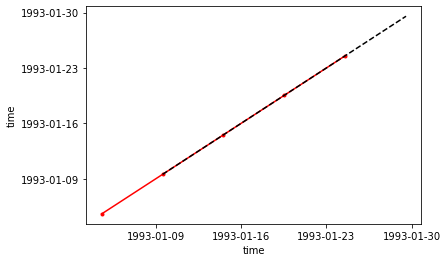

In [71]:
ocean_wg.time[0:5].plot(color='r', marker='.')
dt_values.time[0:5].plot(color='k', linestyle='dashed')

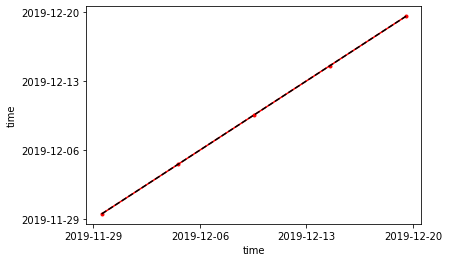

In [72]:
ocean_wg.time[-5:].plot(color='r', marker='.')
dt_values.time[-5:].plot(color='k', linestyle='dashed')

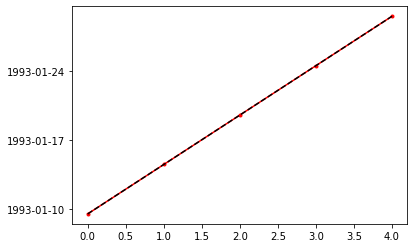

In [73]:
plt.plot(ocean_wg.time.values[1:6], color='r', marker='.')
plt.plot(dt.time.values[0:5], color='k', linestyle='dashed')

**Theta Tendency Term**

In [117]:
ocean_wg.temp

<xarray.DataArray 'temp' (time: 1970, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<getitem, shape=(1970, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
    dt        (time) float32 nan 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05
Attributes:
    cell_methods:   time: mean
    coordinates:    geolon_t geolat_t
    long_name:      Potential temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-10.0, 500.0]

In [118]:
ocean_wg.temp.time

<xarray.DataArray 'time' (time: 1970)>
array([cftime.DatetimeJulian(1993, 1, 4, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:00:00
    dt       (time) float32 nan 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05 4.32e+05

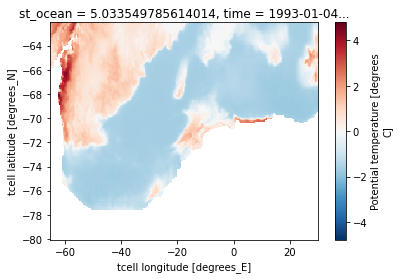

In [120]:
ocean_wg.temp[0,0].plot()

In [74]:
delta_theta = ocean_wg.temp.diff('time')#.load()

In [122]:
delta_theta.time

<xarray.DataArray 'time' (time: 1969)>
array([cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 19, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
    dt       (time) float32 4.32e+05 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [123]:
dt.time

<xarray.DataArray 'time' (time: 1969)>
array([cftime.DatetimeJulian(1993, 1, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 19, 13, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 12, 9, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 14, 13, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 19, 13, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00

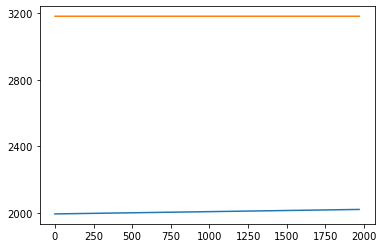

In [125]:
plt.plot(delta_theta.time.values)
plt.plot(ocean_wg.dt.values)

In [133]:
delta_theta

<xarray.DataArray 'temp' (time: 1969, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<sub, shape=(1969, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
    dt        (time) float32 4.32e+05 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [136]:
delta_theta.data

,Array,Chunk
Bytes,25.36 GB,12.88 MB
Shape,"(1969, 50, 169, 381)","(1, 50, 169, 381)"
Count,9848 Tasks,1969 Chunks
Type,float32,numpy.ndarray


In [138]:
ocean_wg.dt.time.shape

(1970,)

In [75]:
#forcing delta_theta to have same timestamp as ds.dt by creating new data array called "theta_scaled"
delta_theta = xr.DataArray(delta_theta.data, dims=['time','st_ocean','yt_ocean','xt_ocean'], 
                            coords={'time': ocean_wg.dt[1:].time.data,
                                    'st_ocean': ocean_wg.st_ocean,
                                    'yt_ocean': ocean_wg.yt_ocean,
                                    'xt_ocean': ocean_wg.xt_ocean})
delta_theta

<xarray.DataArray 'sub-74cf1bb559497381b2debbb5a66ad414' (time: 1969, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<sub, shape=(1969, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88

In [76]:
theta_tend = (delta_theta / ocean_wg.dt)#.load()

In [77]:
theta_tend

<xarray.DataArray (time: 1969, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<truediv, shape=(1969, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
    dt        (time) float32 4.32e+05 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

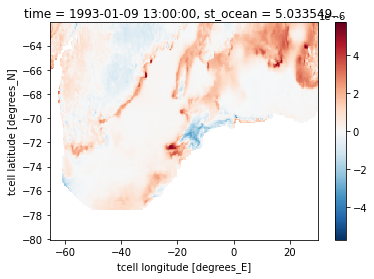

In [142]:
theta_tend[0,0].plot()

In [143]:
theta_tend.coords#[:,1:,1:,1:]

Coordinates:
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
    dt        (time) float32 4.32e+05 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [145]:
dx_interp.coords

Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [173]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [175]:
cells_wg.dz.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [176]:
dz.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [78]:
totttend = theta_tend * dx_interp * cells_wg.dy_u * cells_wg.dz

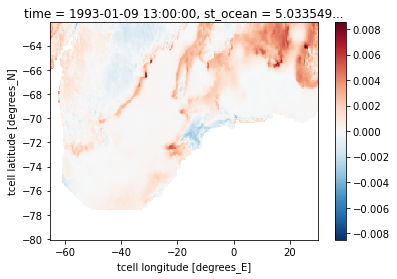

In [79]:
(totttend[0,0]/1e6).plot()

**Salt Tendency Term**

In [80]:
delta_salt = ocean_wg.salt.diff('time')

In [181]:
delta_salt

<xarray.DataArray 'salt' (time: 1969, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<sub, shape=(1969, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
    dt        (time) float32 4.32e+05 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [81]:
#forcing delta_salt to have same timestamp as ds.dt by creating new data array called "salt_scaled"
delta_salt = xr.DataArray(delta_salt.data, dims=['time','st_ocean','yt_ocean','xt_ocean'], 
                            coords={'time': ocean_wg.dt[1:].time.data,
                                    'st_ocean': ocean_wg.st_ocean,
                                    'yt_ocean': ocean_wg.yt_ocean,
                                    'xt_ocean': ocean_wg.xt_ocean})
delta_salt

<xarray.DataArray 'sub-87ace75ed301d2e2489ca6ef622cf580' (time: 1969, st_ocean: 50, yt_ocean: 169, xt_ocean: 381)>
dask.array<sub, shape=(1969, 50, 169, 381), dtype=float32, chunksize=(1, 50, 169, 381), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88

In [82]:
salt_tend = (delta_salt / ocean_wg.dt)

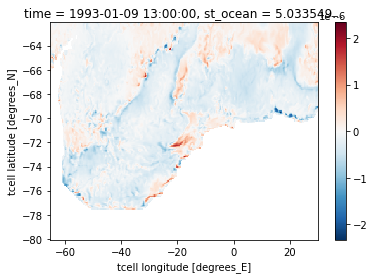

In [185]:
salt_tend[0,0].plot()

In [186]:
salt_tend.coords

Coordinates:
  * time      (time) object 1993-01-09 13:00:00 ... 2019-12-19 13:00:00
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
    dt        (time) float32 4.32e+05 4.32e+05 4.32e+05 ... 4.32e+05 4.32e+05

In [188]:
dx_interp.coords

Coordinates:
  * xt_ocean  (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.38 29.62 29.88
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [189]:
cells_wg.dy_u.coords

Coordinates:
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... -62.37 -62.25 -62.14

In [190]:
cells_wg.dz.coords

Coordinates:
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [83]:
totstend = salt_tend * dx_interp * cells_wg.dy_u * cells_wg.dz

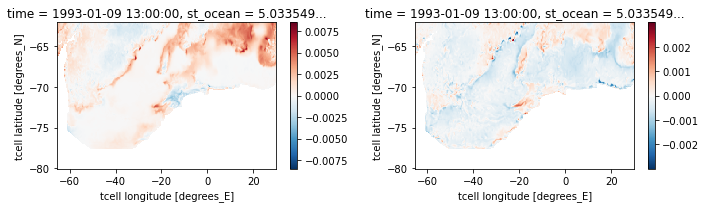

In [84]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(totttend[0,0]/1e6).plot(cmap='RdBu_r', ax=ax0)
(totstend[0,0]/1e6).plot(cmap='RdBu_r', ax=ax1)
plt.tight_layout();

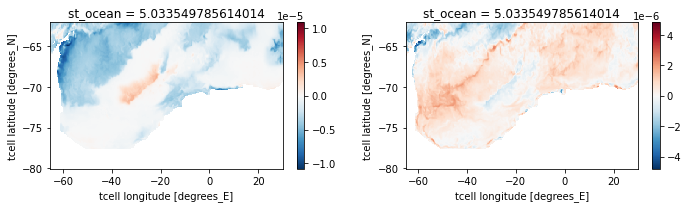

In [85]:
fix, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
(totttend.isel(time=slice(0,-1), st_ocean=0)/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax0)
(totstend.isel(time=slice(0,-1), st_ocean=0)/1e6).mean(dim='time').plot(cmap='RdBu_r', ax=ax1)
plt.tight_layout();

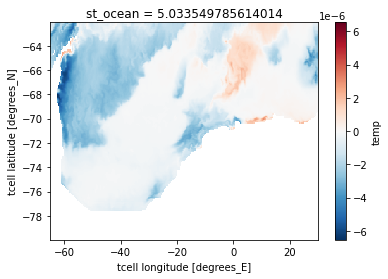

In [212]:
#lat jan minus first jan
((ocean_wg.temp[-71,0, 1:, 1:] - ocean_wg.temp[0,0, 1:, 1:])/1e6).plot(cmap='RdBu_r')#, vmax=0)#, vmin=-6e-5)

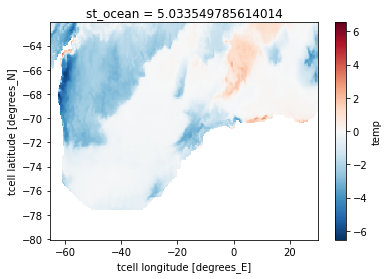

In [213]:
(ocean_wg.temp[-71, 0] - ocean_wg.temp[0, 0]).plot()

In [225]:
transport_wg.time

<xarray.DataArray 'time' (time: 985)>
array([cftime.DatetimeJulian(1993, 1, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 17, 1, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 27, 1, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 11, 27, 1, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 17, 1, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

## Saving Data

In [269]:
ocean_resample = ocean_wg.resample(time='10D').mean()

In [37]:
import json
with open('/home/jovyan/WMT-project/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [87]:
ocean_wg.nbytes/1e9

163.378185912

In [274]:
ocean_resample.nbytes/1e9

81.689094232

In [88]:
client.restart()

Client Scheduler: gateway://traefik-gcp-uscentral1b-staging-dask-gateway.staging:80/staging.75d52fce42964199be01e134b6458ec4 Dashboard: /services/dask-gateway/clusters/staging.75d52fce42964199be01e134b6458ec4/status,Cluster Workers: 24 Cores: 48 Memory: 206.16 GB


In [91]:
transport_wg.nbytes/1e9

25.876708224

In [92]:
#saving transport terms in wg region
gcfs_transport_wg = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SODA/datasets/transport_wg.zarr')
transport_wg.to_zarr(gcfs_transport_wg, mode='w')

In [94]:
cells_wg['dx_interp'] = dx_interp

In [95]:
#saving cell elements in wg region
gcfs_cells_wg = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SODA/datasets/cells_wg.zarr')
cells_wg.to_zarr(gcfs_cells_wg, mode='w')

In [35]:
surf_terms = xr.merge([surf_flux_conv_SLT.rename('surf_flux_conv_SLT'),
                       surf_flux_conv_TH.rename('surf_flux_conv_TH'),
                       sw_flux_conv_TH.rename('sw_flux_conv_TH')])

In [36]:
surf_terms.chunk({'st_ocean':50})

<xarray.Dataset>
Dimensions:             (st_ocean: 50, time: 1970, xt_ocean: 381, yt_ocean: 169)
Coordinates:
  * st_ocean            (st_ocean) float64 5.034 15.1 ... 5.185e+03 5.395e+03
  * time                (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:0...
  * xt_ocean            (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.62 29.88
  * yt_ocean            (yt_ocean) float64 -80.02 -79.92 ... -62.25 -62.14
Data variables:
    surf_flux_conv_SLT  (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    surf_flux_conv_TH   (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    sw_flux_conv_TH     (time, yt_ocean, xt_ocean, st_ocean) float64 dask.array<chunksize=(1, 169, 381, 50), meta=np.ndarray>

In [49]:
surf_terms

<xarray.Dataset>
Dimensions:             (st_ocean: 50, time: 1970, xt_ocean: 381, yt_ocean: 169)
Coordinates:
  * st_ocean            (st_ocean) float64 5.034 15.1 ... 5.185e+03 5.395e+03
  * time                (time) object 1993-01-04 13:00:00 ... 2019-12-19 13:0...
  * xt_ocean            (xt_ocean) float64 -65.12 -64.88 -64.62 ... 29.62 29.88
  * yt_ocean            (yt_ocean) float64 -80.02 -79.92 ... -62.25 -62.14
Data variables:
    surf_flux_conv_SLT  (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    surf_flux_conv_TH   (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 50, 169, 381), meta=np.ndarray>
    sw_flux_conv_TH     (time, yt_ocean, xt_ocean, st_ocean) float64 dask.array<chunksize=(1, 169, 381, 49), meta=np.ndarray>

In [38]:
gcfs_surf_terms = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SODA/datasets/surf_terms.zarr')
surf_terms.chunk({'st_ocean':50}).to_zarr(gcfs_surf_terms, mode='w')

In [98]:
totend = xr.merge([totttend.rename('totttend'),
                   totstend.rename('totstend')])

In [99]:
gcfs_totend = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SODA/datasets/totend.zarr')
totend.to_zarr(gcfs_totend, mode='w')

In [277]:
client.close()
cluster.close()